In [81]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
import signal
import sys
import pylab as plt
from essentia.streaming import *
plt.rcParams['figure.figsize'] = (14,4)

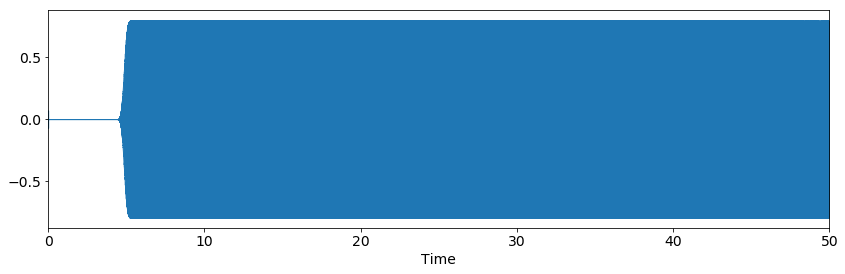

In [84]:
x, fs = librosa.load('sweep.mp3')
#x = x[:fs*30]
librosa.display.waveplot(x, sr=fs)
#source: http://www.theory.physics.ubc.ca/341-current/sweep.html

In [85]:
IPython.display.Audio(x, rate=fs)


In [86]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5,1,'Log-frequency power spectrogram')

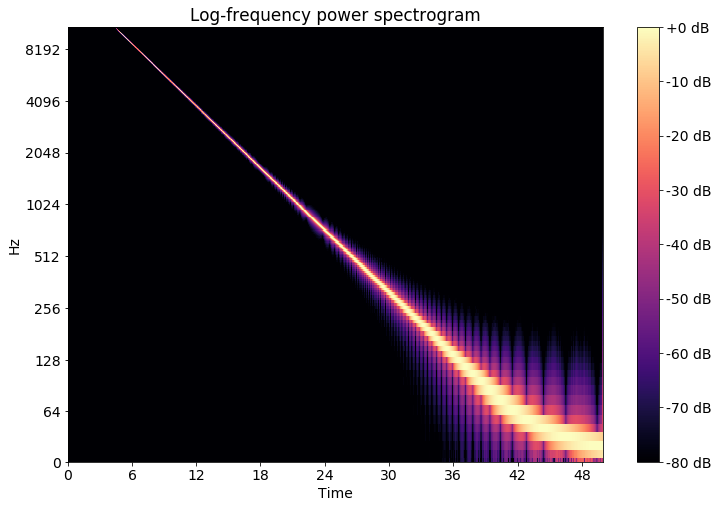

In [100]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

Text(0.5,1,'Linear-frequency power spectrogram')

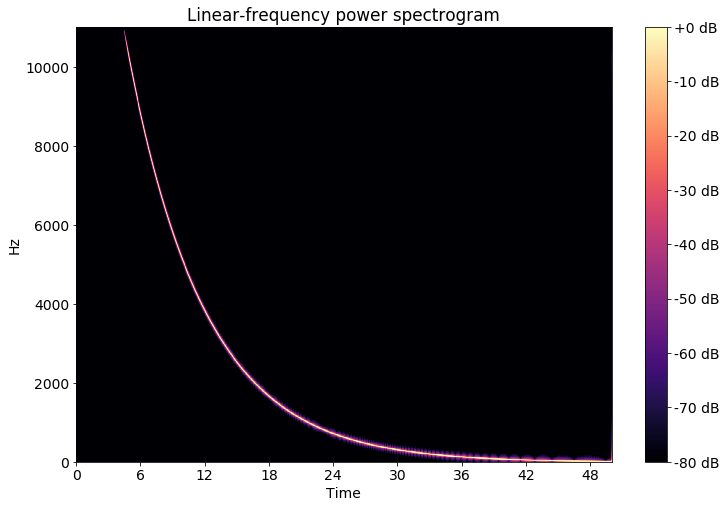

In [101]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, y_axis='linear', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [102]:
mfccs = librosa.feature.mfcc(x, sr=fs, n_mfcc = 2048)
print mfccs.shape

(128, 2154)


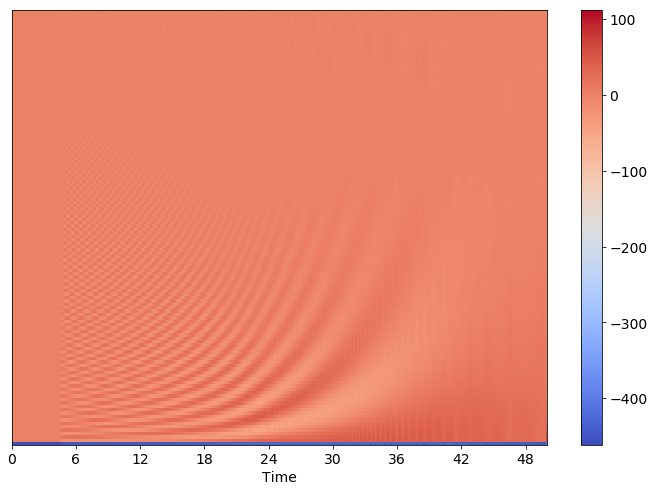

In [103]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [104]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
#print mfccs.mean(axis=1)
#print mfccs.var(axis=1)

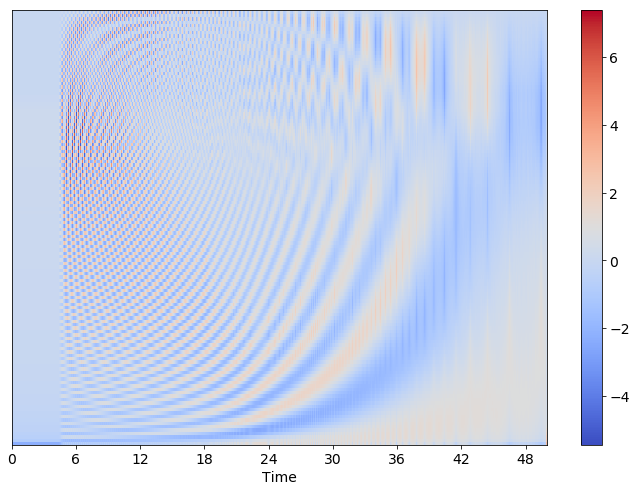

In [105]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [106]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

(2206, 13)


In [107]:
mfccs = sklearn.preprocessing.scale(mfccs)

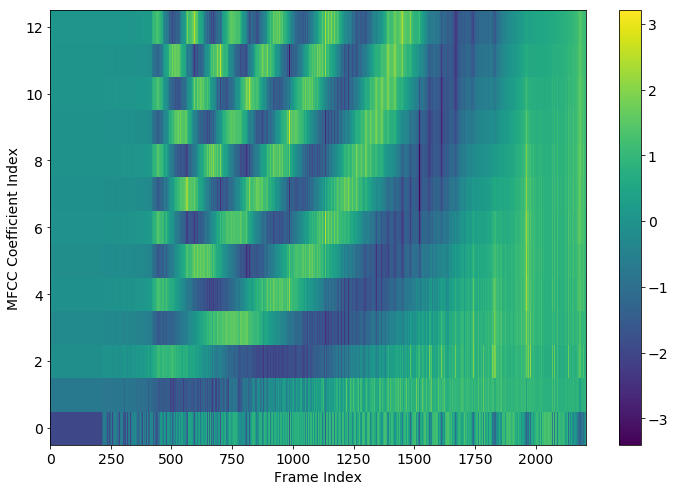

In [108]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 8))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()

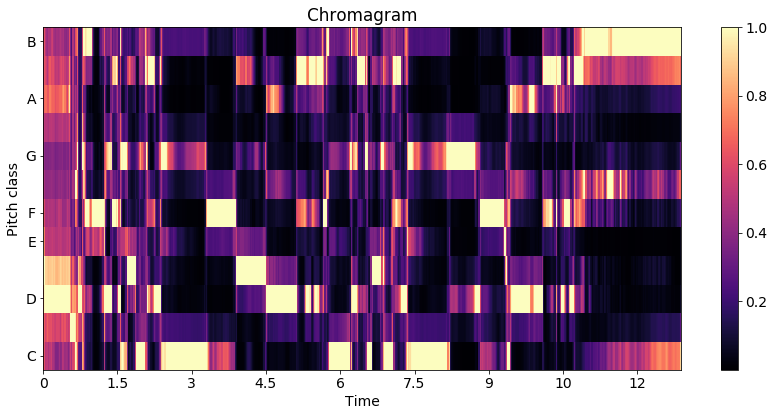

In [76]:
chroma = librosa.feature.chroma_stft(x, fs)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

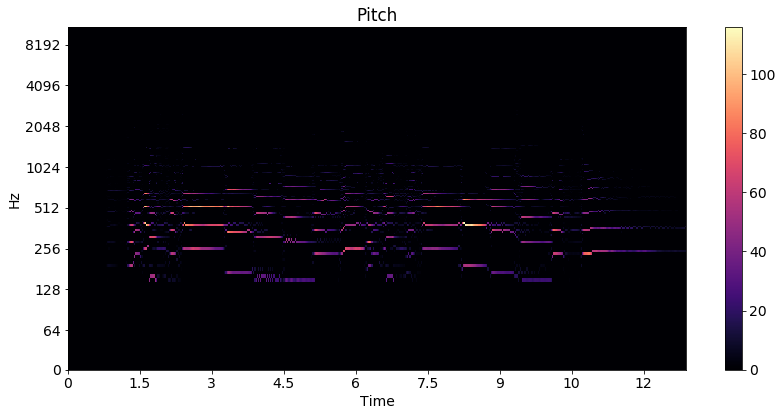

In [77]:
pitches, magnitudes = librosa.piptrack(x, fs)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 6))
librosa.display.specshow(magnitudes, y_axis = 'log', x_axis='time')
plt.colorbar()
plt.title('Pitch')
plt.tight_layout()

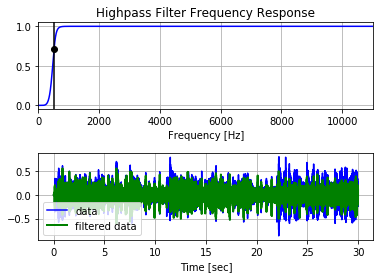

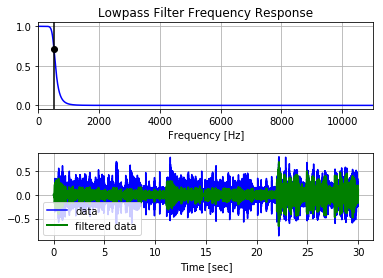

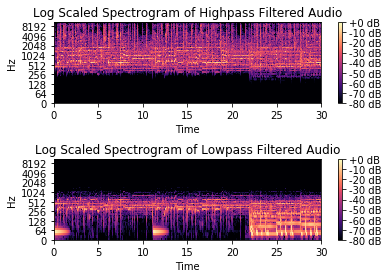

In [16]:
#filter audio signal

import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = fs
cutoff = 512  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 30.0         # seconds
T = len(x)/fs
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = x

# Filter the data, and plot both the original and filtered signals.
x_hp_filtered = butter_highpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, x_hp_filtered, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.figure()

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Filter the data, and plot both the original and filtered signals.
x_lp_filtered = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, x_lp_filtered, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

plt.figure()

plt.subplot(2, 1, 1)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_hp_filtered)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Log Scaled Spectrogram of Highpass Filtered Audio")

plt.subplot(2, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(x_lp_filtered)), ref=np.max)
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Log Scaled Spectrogram of Lowpass Filtered Audio")

plt.subplots_adjust(hspace=0.7)
plt.show()

IPython.display.Audio(x_hp_filtered, rate=fs)

In [17]:
IPython.display.Audio(x_lp_filtered, rate=fs)

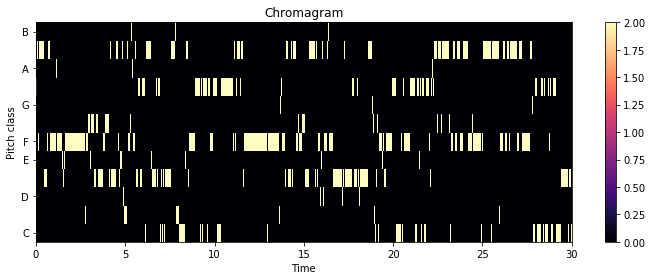

In [18]:
#original audio signal 

chroma = librosa.feature.chroma_stft(x, fs)
chroma = chroma.transpose()
m, n = chroma.shape
    
for i in chroma:
    ind = np.where(i == np.max(i))
    i[ind] = 2
    low_values_flags = i < 1
    i[low_values_flags] = 0
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

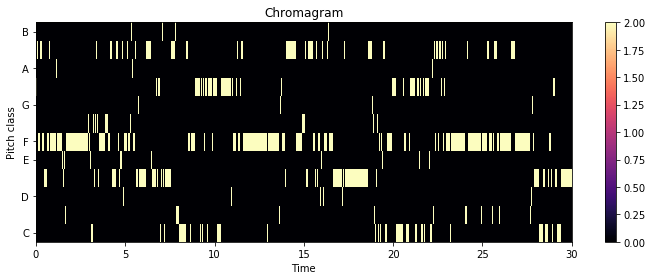

In [19]:
#chroma features for "melody only" highpass filtered audio data

chroma = librosa.feature.chroma_stft(x_hp_filtered, fs)
chroma = chroma.transpose()
m, n = chroma.shape
    
for i in chroma:
    ind = np.where(i == np.max(i))
    i[ind] = 2
    low_values_flags = i < 1
    i[low_values_flags] = 0
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

6.713355887915007


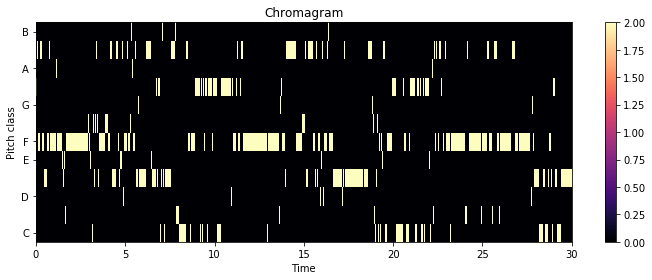

In [20]:
#chroma features for "melody only" highpass filtered audio data, now averaged, leave out "silence"

chroma = librosa.feature.chroma_stft(x_hp_filtered, fs)
threshold = 300
m, n = chroma.shape

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg * 2 

print(threshold)
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 2
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

95.703125


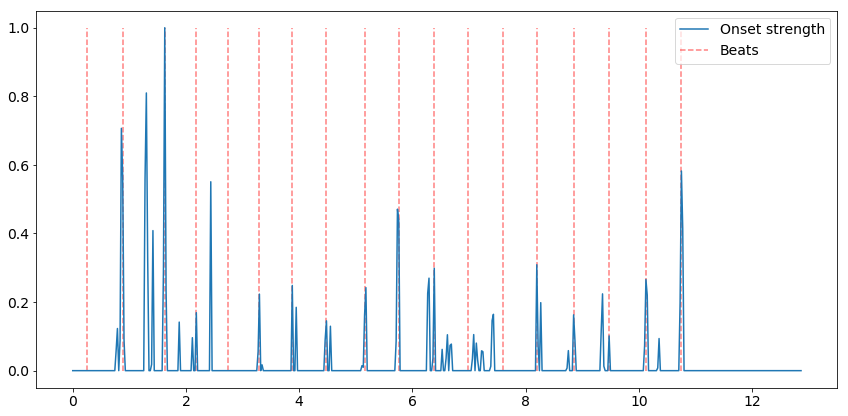

In [79]:
#beat estimation for unfiltered audio

tempo, beats = librosa.beat.beat_track(x, fs)#
print(tempo)
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})

times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
#plt.xlim(0, 10)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

BPM: 95.2
Most prominent peak: 96.0 BPM
Centroid: 95.6


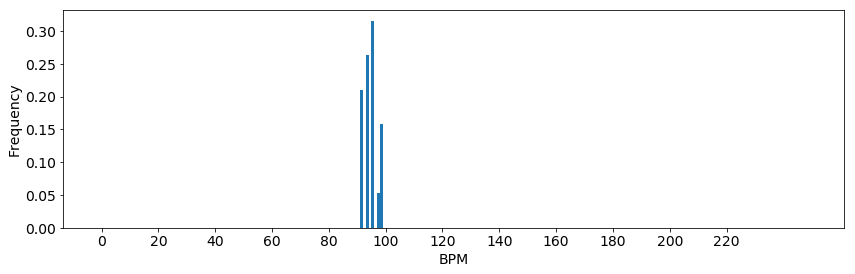

<Figure size 864x432 with 0 Axes>

In [83]:
try:
    audiofile = 'laylac.mp3'
except:
    print ("usage: %s <audiofile>" % sys.argv[0])
    sys.exit()

pool = essentia.Pool()

loader = MonoLoader(filename = audiofile)
bt = RhythmExtractor2013()
bpm_histogram = BpmHistogramDescriptors()
centroid = Centroid(range=250) # BPM histogram output size is 250

loader.audio >> bt.signal
bt.bpm >> (pool, 'bpm')
bt.ticks >> None
bt.confidence >> None
bt.estimates >> None
bt.bpmIntervals >> bpm_histogram.bpmIntervals
bpm_histogram.firstPeakBPM >> (pool, 'bpm_first_peak')
bpm_histogram.firstPeakWeight >> None
bpm_histogram.firstPeakSpread >> None
bpm_histogram.secondPeakBPM >> (pool, 'bpm_second_peak')
bpm_histogram.secondPeakWeight >> None
bpm_histogram.secondPeakSpread >> None
bpm_histogram.histogram >> (pool, 'bpm_histogram')
bpm_histogram.histogram >> centroid.array
centroid.centroid >> (pool, 'bpm_centroid')

essentia.run(loader)
print("BPM: %0.1f" % pool['bpm'])
print("Most prominent peak: %0.1f BPM" % pool['bpm_first_peak'][0])
print("Centroid: %0.1f" % pool['bpm_centroid'][0]) 

histogram = pool['bpm_histogram'][0]

fig, ax = plt.subplots()
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})
ax.bar(range(len(histogram)), histogram, width=1)
ax.set_xlabel('BPM')
ax.set_ylabel('Frequency')
ax.set_xticks([20 * x + 0.5 for x in range(int(len(histogram) / 20))])
ax.set_xticklabels([str(20 * x) for x in range(int(len(histogram) / 20))])
plt.show()

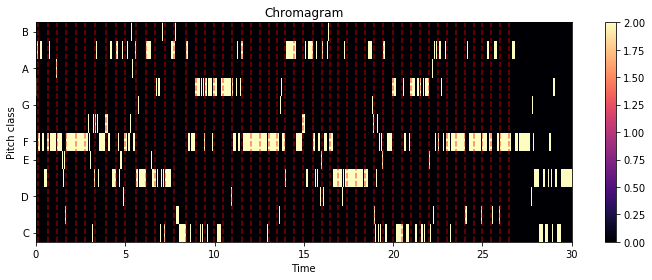

In [22]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

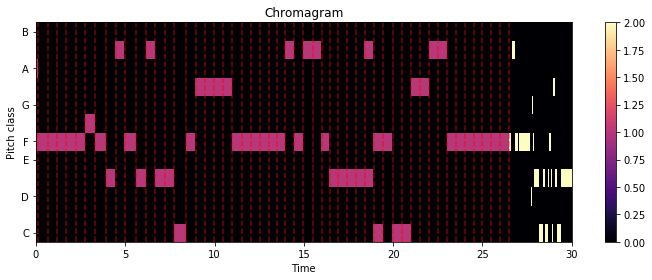

In [23]:
prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

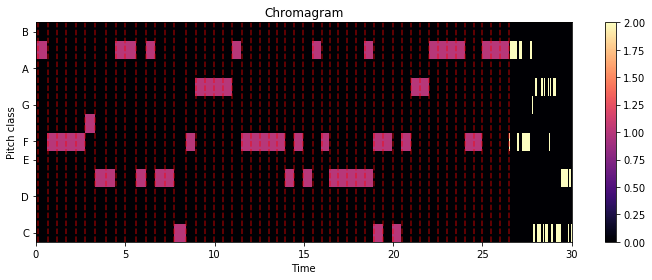

In [24]:
#original audio signal beat aligned

chroma = librosa.feature.chroma_stft(x, fs)
    
for i in chroma:
    ind = np.where(i == np.max(i))
    i[ind] = 2
    low_values_flags = i < 1
    i[low_values_flags] = 0
        
chroma = chroma.transpose()        
prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()


117.45383522727273


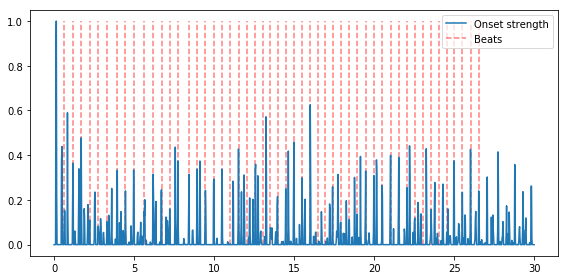

In [25]:
#beat estimation for lowpass filtered audio

tempo, beats = librosa.beat.beat_track(x_hp_filtered, fs)#
print(tempo)
onset_env = librosa.onset.onset_strength(x_hp_filtered, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=fs)

import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a 10-second window
#plt.xlim(0, 10)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()